# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [17]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from scipy import stats

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\soham\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


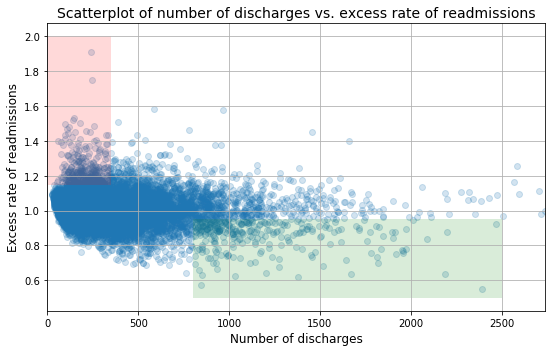

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## Further Analysis

In [11]:
df = clean_hospital_read_df
df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


## A. Do you agree with the above analysis and recommendations? Why or why not?**

Within the preliminary report there are points that I agree with and points that I disagree with. I agree with the initial observations because they are based off the plot created above and nothing else. However, I can neither agree or disagree with the rest of the report because there is no statistical evidence to support any claims made. From the plot alone these statements cannot be made confidently. 

In order to confirm if the claims made in the preliminary report are valid, I will perform further analysis as concrete evidence. In addition, there appear to be null values for the 'Expected Readmission Rate.' We need to remove data points that are not valid from the data frame.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


In [26]:
# Drop any rows that have null values in the 'Excess Readmission Ratio' column: df
df = df.dropna(subset=['Excess Readmission Ratio'])

***
## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

Calculate the Pearson Correlation Coefficient to determine if there is a significant correlation between hospital capacity and readmission rates. 

Our hypotheses are:

$H_o: \rho = 0$

$H_a: \rho \neq 0$

with a significance level of: $\alpha = 0.01$

### Pearson Correlation: Bootstrap

In [29]:
# FUNCTION
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

x_discharge = df['Number of Discharges']
y_readmit = df['Excess Readmission Ratio']

# Computer observed correlation: r_obs
r_obs = pearson_r(x_discharge, y_readmit)


# Iniitalize permutation replicates: perm_reps
perm_reps = np.empty(10000)

# Draw Replicates
for i in range(10000):
    # Permute illiteracy measurments: discharge_permuted
    discharge_permuted = np.random.permutation(x_discharge)

    # Compute Pearson correlation
    perm_reps[i] = pearson_r(discharge_permuted, y_readmit)

# Compute p-value: p
p = np.sum(perm_reps <= r_obs)/ len(perm_reps)

print("The observed Pearson's correlation Coefficient is: ", r_obs)
print('The p-value is: ', p)


The observed Pearson's correlation Coefficient is:  -0.09739794351079353
The p-value is:  0.0


**Analysis:**

The p-value is lower than our significance level of 0.01 and therefore we reject the null hypothesis. There is a correlation between number of discharges and excess readmission. This correlation is however is very small. 

### Statistical Significance v. Practical Significance

**Statistical Significance:** Your results are statistically significant when you able to go through a hypothesis test and reject the null hypothesis at a given significance level. It however does not tell you how impacting it is.

**Practical Significance:** After you prove that something is statistically significant you must determine if it is worth it to make changes. Is the statistically significant value large enough for us to care about? 

In this case there is a significant correlation, but it is weak. I would be cautious about recommending any changes without looking at other variables because making any changes could end up costing more than leaving things as is.

### Scatter Plot

**Advantage:** The scatter plot is useful because it easily displays the relationship between the two variables.

**Disadvantage:** It is hard to accurately represent data when there is a lot because points tend to overlap in highly clustered parts of the plot. Outliers look more extreme than they might actually be. In this case it made it seem like there was a greater negative correlation than there actually was.

Instead let's use a joint plot from the seaborn library that will add a regression line.

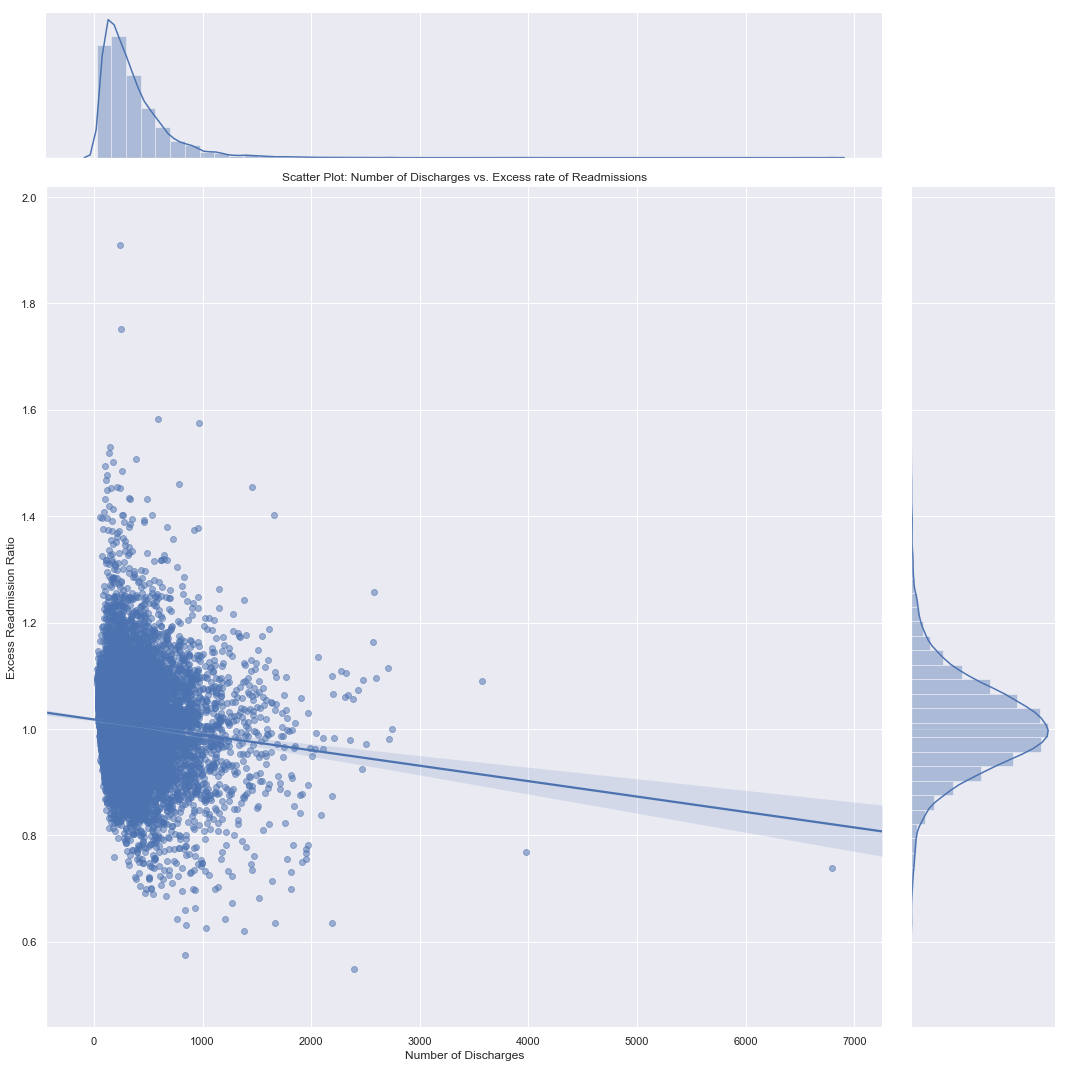

In [35]:
_ = sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=df, kind='reg', height=15, scatter_kws = {'alpha' : 0.5})
_ = plt.title('Scatter Plot: Number of Discharges vs. Excess rate of Readmissions')